# Clustering
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.14.월 14:00-18:00

### 1. Data
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

### 2. Hierarchical Clustering 
- 2-1. `sklearn.cluster.AgglomerativeClustering`
- 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`

### 3. K-means
- 3-1. `sklearn.cluster.KMeans`

### 4. Analysis 
- 4-1. Choose K : Using Silhouette Plot
- 4-2. .groupby()

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
- 5-1. More Preprocessing
- 5-2. 비누 구매 고객 세분화
- 5-3. 타겟 클러스터 선정 및 마케팅 기획

### 1. Data
---
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

#### 1-1.  `BathSoap.xlsx`
---
- sheet3 : DM_Sheet, 멤버 정보 및 비누 구입 정보
- sheet4 : Durables, 멤버들의 비누 이외 타물품 소유 정보
---
비누를 구매한 고객들의 데이터를 토대로 군집화를 이용하여 효과적인 마케팅 전략을 수립하려고 한다. 총 600개의 표본을 각종 변수를 고려하여 치밀하게 표집하였다. 주어진 데이터는 각종 인구통계자료, 내구재 소유 자료, 제품의 카테고리와 각 브랜드에 대한 구매 데이터이다.

*Q. 군집화는 마케팅 전략을 세우는데 어떤 역할을 할 수 있는가?*

#### 1-2. Data Load : `pd.read_excel`
---
`BathSoap.xlsx` 파일에서 데이터가 있는 sheet를 DataFrame으로 변환
* pd.read_excel document 참고
* sheet 위치, header로 쓸 row를 잘 지정할 것
* row의 시작은 0

In [2]:
import pandas as pd

In [3]:
# df
df = pd.read_excel('BathSoap.xlsx', 2, header=2)

In [43]:
# durable_df
durable_df = pd.read_excel('BathSoap.xlsx', 3, header=4)[:600]

#### 1-3. Join Table : `pd.merge`
---
DM_Sheet와 Durables의 DataFrame을 통합
* 'Member id', 'MEM'을 기준으로 통합, Inner Join

In [8]:
merged_df = df.merge(durable_df, how="inner", left_on='Member id', right_on='MEM')
merged_df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
0,1.01001e+06,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.01001e+06,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.01002e+06,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.01002e+06,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.01402e+06,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.01402e+06,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.01403e+06,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.01403e+06,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.01419e+06,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.01419e+06,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# merged_df & set_index
merged_df = df.merge(durable_df, how="inner", left_on='Member id', right_on='MEM').set_index('Member id')
merged_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1-4. Delete Rows & Columns
---
* Delete Rows : 결측치가 있는 행은 지울 것
* Delete Columns : 겹치거나 문제가 있는 열을 지울 것

In [47]:
merged_df.isnull().sum()

SEC                                            0
FEH                                            0
MT                                             0
SEX                                            0
AGE                                            0
EDU                                            0
HS                                             0
CHILD                                          0
CS                                             0
Affluence Index                                0
No. of Brands                                  0
Brand Runs                                     0
Total Volume                                   0
No. of  Trans                                  0
Value                                          0
Trans / Brand Runs                             0
Vol/Tran                                       0
Avg. Price                                     0
Pur Vol No Promo - %                           0
Pur Vol Promo 6 %                              0
Pur Vol Other Promo 

In [11]:
merged_df.isnull().sum(axis = 1) 

Member id
 1010010.0      0
 1010010.0      0
 1010020.0      0
 1010020.0      0
 1014020.0      0
 1014020.0      0
 1014030.0      0
 1014030.0      0
 1014190.0      0
 1014190.0      0
 1017020.0      0
 1017020.0      0
 1017110.0      0
 1017110.0      0
 1017160.0      0
 1017160.0      0
 1017360.0      0
 1017360.0      0
 1017460.0      0
 1017460.0      0
 1017490.0      0
 1017490.0      0
 1020070.0      0
 1020070.0      0
 1020210.0      0
 1020210.0      0
 1024050.0      0
 1024050.0      0
 1024100.0      0
 1024100.0      0
             ... 
 1166080.0      0
 1166080.0      0
 1166340.0      0
 1166340.0      0
 1166460.0      0
 1166460.0      0
 1166470.0      0
 1166470.0      0
 1166740.0      0
 1166740.0      0
 1166870.0      0
 1166870.0      0
 1166960.0      0
 1166960.0      0
 1166980.0      0
 1166980.0      0
 1167090.0      0
 1167090.0      0
 1167230.0      0
 1167230.0      0
 1167340.0      0
 1167340.0      0
 1167350.0      0
 1167350.0      0


In [49]:
merged_df.isnull().sum(axis=1)==0

Member id
1010010.0    True
1010020.0    True
1014020.0    True
1014030.0    True
1014190.0    True
1017020.0    True
1017110.0    True
1017160.0    True
1017360.0    True
1017460.0    True
1017490.0    True
1020070.0    True
1020210.0    True
1024050.0    True
1024100.0    True
1024120.0    True
1024220.0    True
1024400.0    True
1024630.0    True
1025070.0    True
1025140.0    True
1025210.0    True
1027040.0    True
1027160.0    True
1027210.0    True
1027390.0    True
1027480.0    True
1027540.0    True
1027580.0    True
1027680.0    True
             ... 
1163300.0    True
1163410.0    True
1163560.0    True
1163670.0    True
1163760.0    True
1163830.0    True
1165010.0    True
1165070.0    True
1165090.0    True
1165100.0    True
1165160.0    True
1165310.0    True
1165330.0    True
1165390.0    True
1165460.0    True
1165720.0    True
1166020.0    True
1166080.0    True
1166340.0    True
1166460.0    True
1166470.0    True
1166740.0    True
1166870.0    True
1166960.0    True


In [50]:
# Delete Rows : no_nan_df 
no_nan_df = merged_df[merged_df.isnull().sum(axis=1) == 0]

In [51]:
no_nan_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=115)

In [52]:
list(no_nan_df.columns) # MEM is problematic. need to remove that.# Unnamed: 1 is same as "Affluence Index." remove both

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'MEM',
 'Unnamed: 1',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD

In [53]:
want_to_delete_cols = ['MEM','Unnamed: 1']
X_df = no_nan_df.drop(want_to_delete_cols, axis = 1)
list(X_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

In [498]:
# Delete columns : X_df
X_df = no_nan_df.drop(['MEM', 'Unnamed: 1'], axis=1)

### 2. Hierarchical Clustering 
---


#### 2-1. `sklearn.cluster.AgglomerativeClustering`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [54]:
# import packages
from sklearn.cluster import AgglomerativeClustering

In [55]:
# parameter setting
n_clusters = 5

In [22]:
# sklearn_hc_model
sklearn_hc_model = AgglomerativeClustering(n_clusters=n_clusters)

In [24]:
# fit to model
sklearn_hc_model.fit(X_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x7f96b019f950>)

In [30]:
# get predicted labels
predicted_labels_sklearn = sklearn_hc_model.labels_
#sklearn_model.fit_predict(X_df)

In [44]:
sklearn_hc_model.fit_predict(X_df)

array([2, 2, 3, ..., 2, 3, 3])

In [56]:
result_df = X_df.copy() # 꼬임방지
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
result_df['sklearn_hc_labels']= sklearn_hc_model.labels_

In [504]:
# add result column to copied df
result_df = preprocessed_df.copy()
result_df['sklearn_labels'] = predicted_labels_sklearn

#### 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`
---
- Linkage Matrix
- Dendromgram & Set k
- get predicted_labels 

##### Linkage Matrix : `scipy.cluster.hierarchy.linkage`

In [58]:
# import packages
from scipy.cluster.hierarchy import linkage

In [59]:
# Z = linkage(X, method)
Z = linkage(X_df, 'centroid')

In [60]:
# What is Z, linkage?
Z[:10] 

array([[ 239.        ,  492.        ,    2.44948974,    2.        ],
       [ 552.        ,  600.        ,   18.31741733,    3.        ],
       [  45.        ,  515.        ,   19.77718811,    2.        ],
       [ 224.        ,  485.        ,   27.13671675,    2.        ],
       [ 309.        ,  428.        ,   34.64341681,    2.        ],
       [ 297.        ,  413.        ,   36.02888509,    2.        ],
       [ 360.        ,  588.        ,   37.32055277,    2.        ],
       [ 285.        ,  583.        ,   40.13342103,    2.        ],
       [  14.        ,   70.        ,   44.96090628,    2.        ],
       [ 411.        ,  601.        ,   46.23053478,    4.        ]])

여기 600은 제일 처음 만들어진 묶음을 의미 (처음에 0~599) 였음. 두번쨰 줄, 앞의 두 개와 뒤 한 개 합쳐져서 총 세 개 합쳐졌다는 뜻. ## 

In [62]:
Z[598]

array([  1190.       ,   1197.       ,  37519.0134491,    600.       ])

##### Dendrogram & Set k : `scipy.cluster.hierarchy.dendrogram`

In [63]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [64]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Data')
    plt.ylabel('Distance')

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

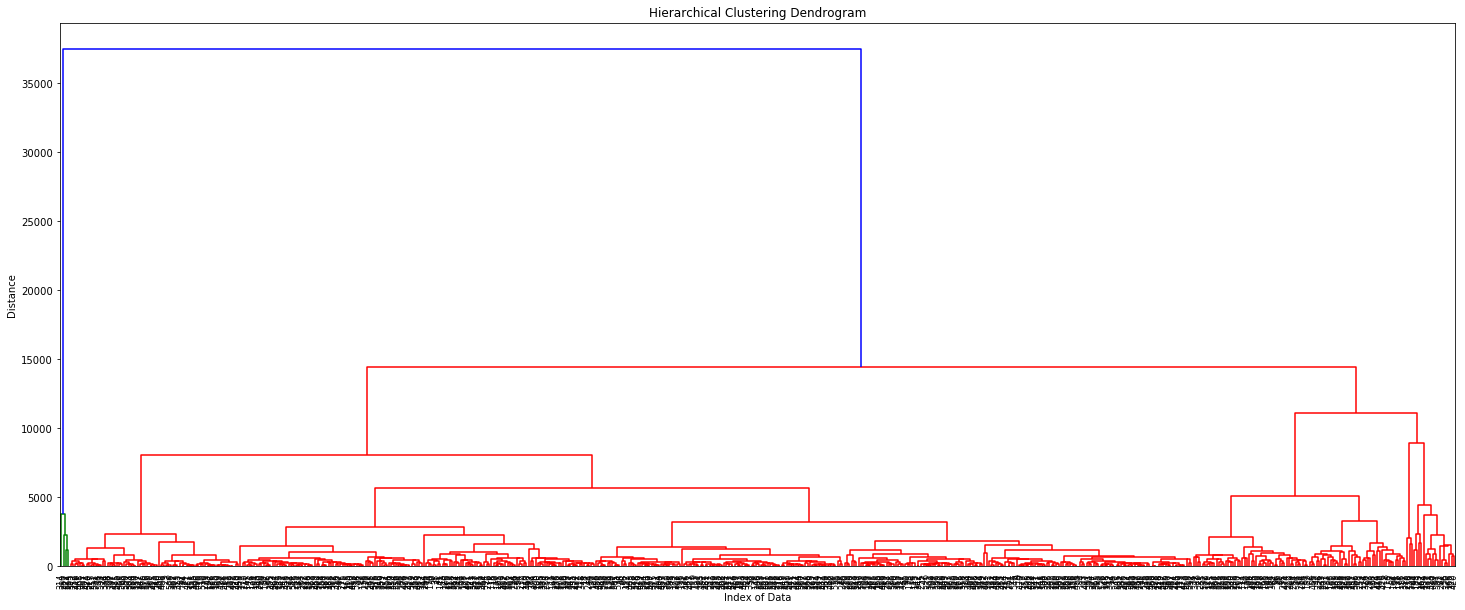

In [65]:
# plot dendrogram
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z)

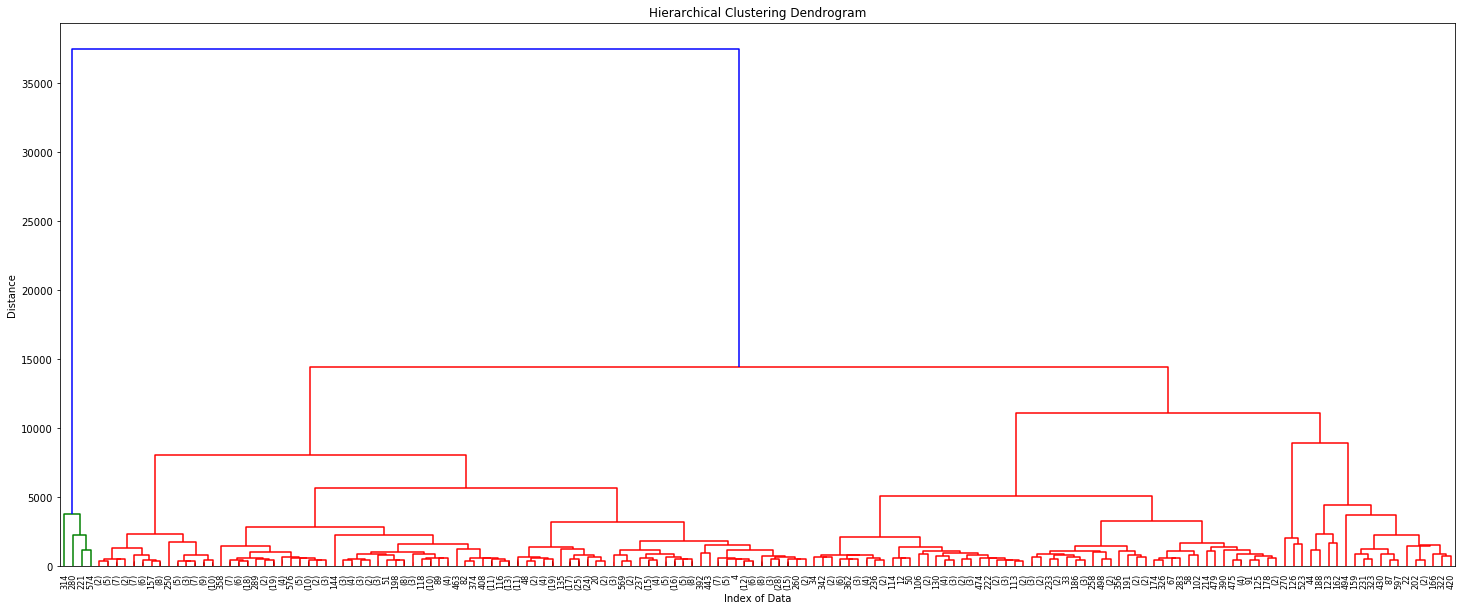

In [69]:
# Dendrogram에 표현할 가지의 개수 정하기 - set p #보고 싶은 가지의 갯수 정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z, p=160)

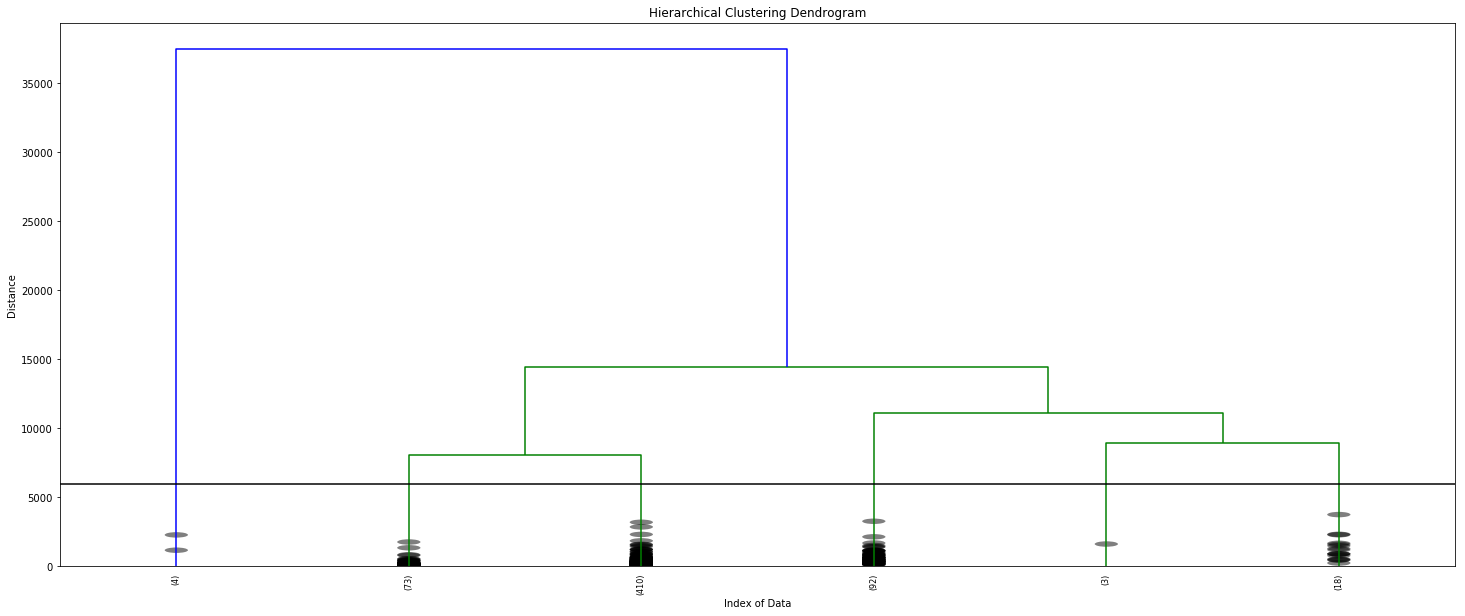

In [73]:
# k를 결정하기 위해, k보다 큰 개수의 p를 가진 dendrogram을 그리고, max_distance를 결정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z, p=6,max_d = 6000)

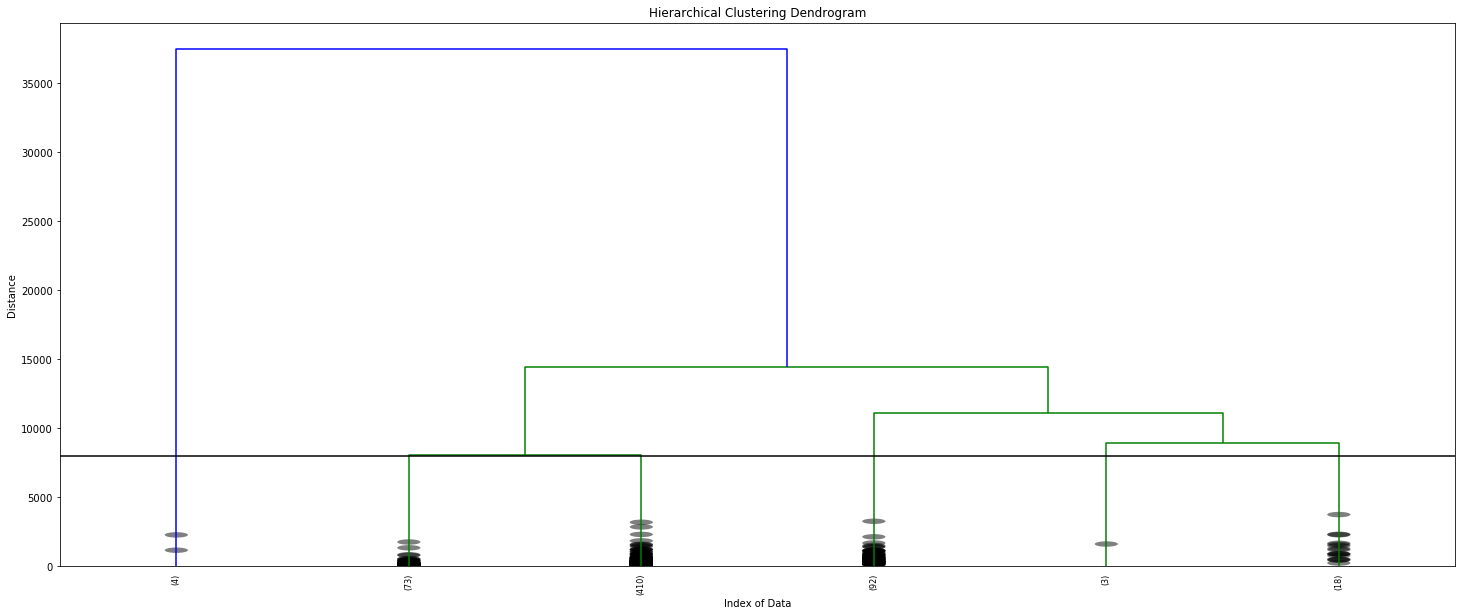

In [74]:
# max_distance에 해당하는 선을 Dendrogram에 그려서 원하는 k를 표현하기 위한 max_distance를 확정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', 
                Z, p=6, max_d=8000)

##### predicted_labels : `scipy.cluster.hierarchy.fcluster`

In [77]:
max_d = 8200 # depth

In [78]:
# import packages
from scipy.cluster.hierarchy import fcluster

In [80]:
# predicted_labels
predicted_labels_scipy = fcluster(Z, max_d, criterion = 'distance')
predicted_labels_scipy # 1부터 5까지 잘 맞게 되ㅓ 있다. 

array([2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 5, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3,
       3, 5, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 3, 3, 5, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2,

In [95]:
# save to result_dfd_labesl

result_df['scipy_hc_labels'] =predicted_labels_scipy

### 3. K-Means
---
##### 3-1. `sklearn.cluster.KMeans`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [83]:
from sklearn.cluster import KMeans

In [84]:
# set parameters
n_cluster = 5

In [85]:
# kmeans_model
kmeans_model = KMeans(n_clusters=n_cluster) # 이렇게 빈 껍떼기를 만들다

In [86]:
kmeans_model.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
# predicted_labels
kmeans_model.labels_
#kmeans_model.fit_predict(preprocessed_df)

array([1, 4, 3, 2, 1, 4, 1, 1, 3, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 2, 2, 1, 3,
       2, 2, 4, 1, 1, 1, 2, 4, 1, 2, 3, 4, 1, 2, 1, 4, 2, 1, 4, 3, 2, 0, 1,
       2, 1, 2, 4, 3, 4, 2, 3, 4, 4, 3, 4, 3, 1, 4, 4, 4, 1, 1, 1, 3, 3, 1,
       4, 1, 1, 1, 2, 4, 2, 2, 1, 3, 2, 2, 3, 4, 2, 2, 4, 1, 3, 2, 4, 1, 3,
       1, 1, 1, 1, 4, 1, 2, 1, 4, 4, 3, 4, 1, 4, 4, 1, 1, 1, 4, 4, 4, 4, 3,
       1, 4, 1, 4, 1, 4, 4, 4, 0, 3, 3, 0, 1, 1, 4, 4, 4, 1, 1, 2, 2, 1, 2,
       1, 3, 4, 4, 1, 1, 4, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 3, 4,
       3, 0, 4, 3, 1, 3, 2, 4, 4, 4, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 4, 1, 2,
       4, 4, 3, 4, 0, 1, 4, 3, 2, 1, 4, 1, 1, 2, 4, 1, 1, 3, 3, 1, 1, 1, 2,
       3, 1, 4, 1, 2, 1, 4, 3, 2, 1, 2, 1, 1, 1, 0, 4, 2, 1, 2, 4, 4, 2, 2,
       1, 3, 4, 3, 1, 4, 4, 1, 3, 2, 1, 1, 1, 2, 4, 2, 2, 2, 1, 2, 2, 1, 2,
       3, 4, 1, 4, 4, 3, 1, 1, 2, 1, 4, 4, 1, 4, 1, 1, 1, 0, 3, 2, 1, 4, 1,
       4, 1, 2, 2, 0, 4, 1, 3, 4, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 4, 4, 1, 4,
       1, 2,

In [88]:
# cluster_centers_
kmeans_model.cluster_centers_
# 클러스터 센터 값이 5개 나오겠지. 그런데 지금 우리 데이터는 113차원 짜리. 각 차원마다 평균값이 있겠지. # 113개 변수 평균값 다섯개 나옴. 클러스터 중심

array([[  2.45454545e+00,   2.00000000e+00,   9.72727273e+00,
          2.00000000e+00,   3.72727273e+00,   4.18181818e+00,
          7.27272727e+00,   2.63636364e+00,   9.09090909e-01,
          1.80000000e+01,   3.90909091e+00,   1.78181818e+01,
          4.11950000e+04,   4.40000000e+01,   4.64930455e+03,
          3.09524062e+00,   1.22195230e+03,   1.13047860e+01,
          9.73461709e-01,   1.45852698e-02,   1.19530211e-02,
          3.84633368e-01,   3.64994254e-02,   4.19804393e-03,
          5.30185632e-03,   2.38153430e-02,   4.55519613e-02,
          1.05454545e-02,   4.91270535e-03,   4.84541842e-01,
          1.69789602e-01,   6.17045709e-01,   3.64994254e-02,
          1.76665263e-01,   7.39270662e-01,   7.03344562e-02,
          1.71514437e-02,   1.80742569e-02,   2.92425800e-02,
          6.02407429e-03,   4.55519613e-02,   4.55802708e-03,
          2.61372736e-02,   3.64994254e-02,   7.15583919e-03,
          0.00000000e+00,   4.54545455e-01,   3.63636364e-01,
        

In [93]:
# add result to result_df
result_df['kmeans_labels'] =kmeans_model.labels_

In [96]:
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,scipy_labels,kmeans_labels,scipy_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4,2
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,3
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3


### 4. Analysis
---
#### 4-1. Choose k : Using Silhouette Plot
---

In [524]:
# import packages
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [525]:
# silhouette_avg
silhoutette_avg = silhouette_score(X_df, result_df['kmeans_labels'])

In [526]:
# silhouette_value of each data
sample_silhouette_values = silhouette_samples(X_df, result_df['kmeans_labels'])

In [527]:
def plot_silhouette(X_df, labels):
    cluster_labels = sorted(np.unique(labels))
    n_clusters = len(cluster_labels)
    
    plt.figure()

    # axis setting
    ax = plt.gca()
    ax.set_xlim([-0.5, 1])
    ax.set_ylim([0, X_df.shape[0] + (n_clusters + 1) * 10])

    y_lower = 10
    
    silhouette_avg = silhouette_score(X_df, labels)
    print("k : {}".format(n_clusters))
    print("silhouette_avg : {}".format(silhouette_avg))
    data_silhouette_values = silhouette_samples(X_df, labels)

    for i in cluster_labels:
        # 특정 클러스터의 silhouette 값만 추출
        ith_cluster_silhouette_values = data_silhouette_values[labels == i]
        
        # 내림차순으로 정렬
        ith_cluster_silhouette_values.sort()

        # 해당 클러스터의 크기
        size_cluster_i = len(ith_cluster_silhouette_values)
       
        # 클러스터의 silhouette을 표시할 y축 최고값 결정
        y_upper = y_lower + size_cluster_i

        # 색
        color = cm.spectral(float(i) / n_clusters)
        
        # plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # y축에 클러스터 이름 표시
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 클러스터의 silhouette을 표시할 최저점 조정
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for k={}".format(n_clusters))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # silhouette 평균 값을 나타내는 선
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 값 제거
    ax.set_yticks([])

    plt.show() 

k : 2
silhouette_avg : 0.6440512333889737


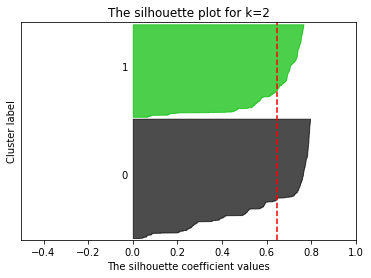

k : 3
silhouette_avg : 0.5996487526087213


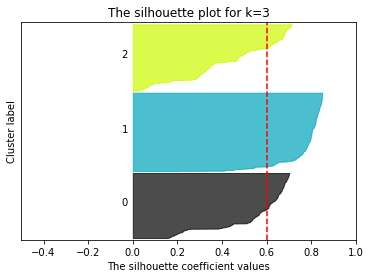

k : 4
silhouette_avg : 0.6334000582083456


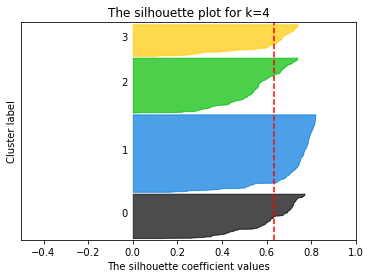

k : 5
silhouette_avg : 0.5959177149004259


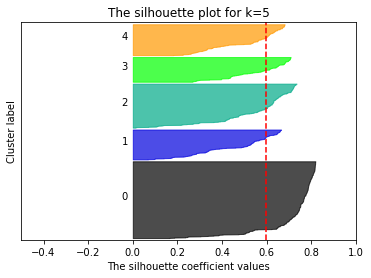

In [528]:
# plot silhouette for choosing k
k_candidates = [2, 3, 4, 5]
for i in k_candidates:
    ith_model = KMeans(n_clusters=i)
    labels = ith_model.fit_predict(preprocessed_df)
    plot_silhouette(preprocessed_df, labels)

#### 4-2. groupby()

In [98]:
result_df.groupby('scipy_labels').mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,kmeans_labels,scipy_hc_labels
scipy_labels,,,,,,,,,,,,,,,,,,,,,
1,2.000000,2.000000,9.000000,2.000000,4.000000,3.000000,9.000000,2.250000,1.000000,16.250000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
2,2.412008,1.917184,7.776398,1.689441,3.175983,4.072464,3.732919,3.316770,0.904762,16.732919,...,0.010352,0.016563,0.0,0.0,0.0,0.0,0.0,0.0,1.828157,2.0
3,2.913043,2.641304,9.652174,1.923913,3.315217,3.847826,5.945652,2.847826,1.032609,17.891304,...,0.054348,0.010870,0.0,0.0,0.0,0.0,0.0,0.0,3.521739,3.0
4,2.333333,2.333333,10.333333,2.000000,3.333333,5.333333,6.000000,2.333333,1.000000,21.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.0
5,2.888889,2.500000,10.888889,2.000000,3.500000,4.277778,6.166667,3.333333,1.111111,19.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,5.0


*Q. 지금까지 진행해온 분석의 문제점은?*
- 범주형 변수를 수치형 변수처럼 분석함
- 수치형 데이터가 동일한 범위를 갖지 않음
- 구매와 관련된 변수만 선택되지 않았음

1. 수치가 의미가 없음. 2.5만큼의 채식? 2. 5000의 차이와 8의 차이 3. 필요업없는 변수도 너무 많이 추가됨. 

##### result_df

In [103]:
# Hint 1
result_df.groupby('sklearn_hc_labels_').mean().iloc[:, :10]
# Hint 2 
X_df.iloc[:10, 11:46]
# Hint 3 : 현재 변수의 개수
X_df.columns

KeyError: 'sklearn_hc_labels_'

In [104]:
# Hint 1
result_df.groupby('sklearn_labels').mean().iloc[:, :10]

KeyError: 'sklearn_labels'

In [105]:
# Hint 2 
X_df.iloc[:10, 11:46]

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Radio/Transistor with FM
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,17.0,8025.0,24.0,818.0,1.411765,334.375000,10.193146,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.0
1010020.0,25.0,13975.0,40.0,1681.5,1.600000,349.375000,12.032200,0.887299,0.096601,0.016100,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.0
1014020.0,37.0,23100.0,63.0,1950.0,1.702703,366.666667,8.441558,0.941558,0.019481,0.038961,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.0
1014030.0,4.0,1500.0,4.0,114.0,1.000000,375.000000,7.600000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.0
1014190.0,6.0,8300.0,13.0,591.0,2.166667,638.461538,7.120482,0.614458,0.144578,0.240964,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.0
1017020.0,26.0,18175.0,41.0,1705.5,1.576923,443.292683,9.383769,1.000000,0.000000,0.000000,...,0.000000,0.006878,0.071527,0.0,0.000000,0.000000,0.0,0.066025,0.269601,0.0
1017110.0,17.0,9950.0,26.0,1007.5,1.529412,382.692308,10.125628,0.977387,0.022613,0.000000,...,0.022613,0.007538,0.000000,0.0,0.000000,0.000000,0.0,0.045226,0.103015,0.0
1017160.0,8.0,9300.0,25.0,569.5,3.125000,372.000000,6.123656,0.935484,0.000000,0.064516,...,0.000000,0.000000,0.000000,0.0,0.000000,0.008065,0.0,0.895161,0.032258,0.0
1017360.0,12.0,26490.0,27.0,3113.5,2.250000,981.111111,11.753492,0.898075,0.101925,0.000000,...,0.000000,0.000000,0.015100,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [532]:
# Hint 3 : 현재 변수의 개수
X_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=113)

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
---
#### 5-1. More Preprocessing
---
##### 1. ???

In [534]:
list(X_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

In [106]:
# dummify needed cols =
# dummified_df
dummy_needed_cols = ['SEC','FEH','MT', 'SEX','EDU','CHILD', 'CS','AGE']
dummified_df = pd.get_dummies(X_df, columns=dummy_needed_cols)

In [107]:
list(dummified_df.columns)

['HS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black & White',
 'Colour TV with remote',
 'Colour TV without remote',

In [109]:
dummified_df

,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,CHILD_3.0,CHILD_4.0,CHILD_5.0,CS_0.0,CS_1.0,CS_2.0,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,2.0,2.0,3.0,17.0,8025.0,24.0,818.00,1.411765,334.375000,10.193146,...,0,1,0,0,1,0,0,0,0,1
1010020.0,4.0,19.0,5.0,25.0,13975.0,40.0,1681.50,1.600000,349.375000,12.032200,...,0,0,0,0,1,0,0,1,0,0
1014020.0,6.0,23.0,5.0,37.0,23100.0,63.0,1950.00,1.702703,366.666667,8.441558,...,0,1,0,0,1,0,0,0,0,1
1014030.0,0.0,0.0,2.0,4.0,1500.0,4.0,114.00,1.000000,375.000000,7.600000,...,0,0,1,1,0,0,0,0,0,1
1014190.0,4.0,10.0,3.0,6.0,8300.0,13.0,591.00,2.166667,638.461538,7.120482,...,1,0,0,0,1,0,0,0,1,0
1017020.0,5.0,13.0,3.0,26.0,18175.0,41.0,1705.50,1.576923,443.292683,9.383769,...,0,0,0,0,1,0,0,0,1,0
1017110.0,3.0,11.0,4.0,17.0,9950.0,26.0,1007.50,1.529412,382.692308,10.125628,...,0,0,0,0,1,0,0,0,0,1
1017160.0,5.0,0.0,3.0,8.0,9300.0,25.0,569.50,3.125000,372.000000,6.123656,...,1,0,0,1,0,0,0,1,0,0
1017360.0,6.0,17.0,2.0,12.0,26490.0,27.0,3113.50,2.250000,981.111111,11.753492,...,0,1,0,0,1,0,0,0,0,1


##### 2. ???

In [112]:
# scale needed cols = 
# scaled_df 
# 스케일링

want_to_scale_cols = X_df.columns[11:45] # 모두 숫자인 아이들
want_to_scale_cols

Index(['Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
       'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %',
       'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'Br. Cd. 57, 144',
       'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481',
       'Br. Cd. 352', 'Br. Cd. 5', 'Others 999', 'Pr Cat 1', 'Pr Cat 2',
       'Pr Cat 3', 'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7',
       'PropCat 8', 'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12',
       'PropCat 13', 'PropCat 14', 'PropCat 15'],
      dtype='object')

In [113]:
preprocessed_df = dummified_df.copy()

In [119]:
dummified_df.columns

Index(['HS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ',
       ...
       'CHILD_3.0', 'CHILD_4.0', 'CHILD_5.0', 'CS_0.0', 'CS_1.0', 'CS_2.0',
       'AGE_1.0', 'AGE_2.0', 'AGE_3.0', 'AGE_4.0'],
      dtype='object', length=153)

In [115]:
preprocessed_df[want_to_scale_cols] = (preprocessed_df[want_to_scale_cols] - preprocessed_df[want_to_scale_cols].mean())/ preprocessed_df[want_to_scale_cols].std()

In [114]:
preprocessed_df[want_to_scale_cols].mean() # 기본적으로 열 기준으로 함수 실행시켜 준다. 

Brand Runs                  15.751667
Total Volume             11914.770000
No. of  Trans               31.153333
Value                     1337.386433
Trans / Brand Runs           2.617719
Vol/Tran                   415.050903
Avg. Price                  11.834572
Pur Vol No Promo - %         0.913008
Pur Vol Promo 6 %            0.053500
Pur Vol Other Promo %        0.033492
Br. Cd. 57, 144              0.183822
Br. Cd. 55                   0.129347
Br. Cd. 272                  0.033155
Br. Cd. 286                  0.033948
Br. Cd. 24                   0.019321
Br. Cd. 481                  0.025923
Br. Cd. 352                  0.034232
Br. Cd. 5                    0.018186
Others 999                   0.521992
Pr Cat 1                     0.279037
Pr Cat 2                     0.493142
Pr Cat 3                     0.139204
Pr Cat 4                     0.088618
PropCat 5                    0.457164
PropCat 6                    0.092324
PropCat 7                    0.096909
PropCat 8   

In [116]:
preprocessed_df[want_to_scale_cols] # 모두 스케일링이 잘 되었다! 

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,0.120073,-0.500590,-0.410468,-0.588103,-0.462990,-0.324310,-0.438559,0.728027,-0.575347,-0.465256,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.829274,-0.261268,-0.021198,3.586695
1010020.0,0.889564,0.265139,0.507634,0.389641,-0.390723,-0.264012,0.052803,-0.215162,0.463515,-0.241597,...,1.531440,-0.357967,-0.419813,-0.262584,-0.264145,0.301285,-0.236281,-0.261268,-0.210415,-0.289959
1014020.0,2.043801,1.439471,1.827405,0.693664,-0.351293,-0.194501,-0.906551,0.238934,-0.365851,0.075979,...,0.173682,-0.323659,-0.454406,-0.352582,-0.264145,-0.298244,0.380680,-0.261268,1.598254,-0.252893
1014030.0,-1.130350,-1.340318,-1.558096,-1.385245,-0.621075,-0.161001,-1.131400,0.728027,-0.575347,-0.465256,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,1.742258,-0.289959
1014190.0,-0.937978,-0.465199,-1.041663,-0.845136,-0.173168,0.898092,-1.259518,-2.498548,0.979469,2.882140,...,-0.555062,-0.495041,-0.209457,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,0.030437,-0.289959
1017020.0,0.985750,0.805654,0.565015,0.416816,-0.399583,0.113530,-0.654809,0.728027,-0.575347,-0.465256,...,0.040363,-0.495041,-0.480264,0.648264,-0.264145,-0.298244,-0.236281,-0.261268,-0.264827,2.787961
1017110.0,0.120073,-0.252854,-0.295705,-0.373532,-0.417823,-0.130079,-0.456598,0.538780,-0.332163,-0.465256,...,-0.555062,-0.379527,-0.475937,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,-0.343004,0.886120
1017160.0,-0.745605,-0.336505,-0.353087,-0.869480,0.194756,-0.173061,-1.525852,0.188096,-0.575347,0.430983,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.070209,-0.261268,2.851698,0.078317
1017360.0,-0.360859,1.875744,-0.238324,2.011100,-0.141175,2.275515,-0.021663,-0.124978,0.520772,-0.465256,...,1.130106,-0.495041,-0.525344,-0.250027,-0.264145,-0.298244,-0.236281,-0.261268,-0.512998,-0.289959


In [132]:
mul1_col = preprocessed_df['Trans / Brand Runs'] * preprocessed_df['Vol/Tran']

In [133]:
mul2_col = preprocessed_df['Brand Runs']

In [138]:
from sklearn.cluster import KMeans

In [ ]:
from skleanr.cluster import 

In [140]:
kmeans_model = KMeans(n_clusters=3) 
kmeans_model.fit(dummified_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
scaled_df = dummified_df.merge(preprocessed_df[want_to_scale_cols])
scaled_df

,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,CHILD_3.0,CHILD_4.0,CHILD_5.0,CS_0.0,CS_1.0,CS_2.0,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0


In [118]:
scaled_df[scale_needed_cols]

NameError: name 'scaled_df' is not defined

#### 5-2. 비누 구매 고객 세분화
---
- 구매 행동(구매량, 빈도, 할인에 대한 민감성, 브랜드 충성도), 구매 기반(가격, 구매제의) 등의 변수를 이용하여 군집화하라
- 어떤 군집화 방법을 선택할 것인가? 그 이유는 무엇인가?
- k는 몇 개로 선택할 것인가? 한번에 진행 가능한 마케팅 전략이 2~5개라고 할 때 k의 개수는 타당한가? 

##### 변수 선택
---
구매행태에 관련있는 No. of Brands ~ PropCat 15까지를 구매 패턴과 관련된 군집화의 변수로 사용한다.

In [117]:
X_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=113)

In [ ]:
atts_buy_behaviors = ['']
atts_buy_foundations = []

In [1]:
# Select Features
selected_feautures = scaled_df.columns[5:40]
selected_features_df = scaled_df[selected_feautures]

NameError: name 'scaled_df' is not defined

##### 방법 선정
---
AgglomerativeClustering을 사용한다. Dendrogram을 통해 클러스터의 거리 차를 토대로 k를 선정할 수 있으며, 

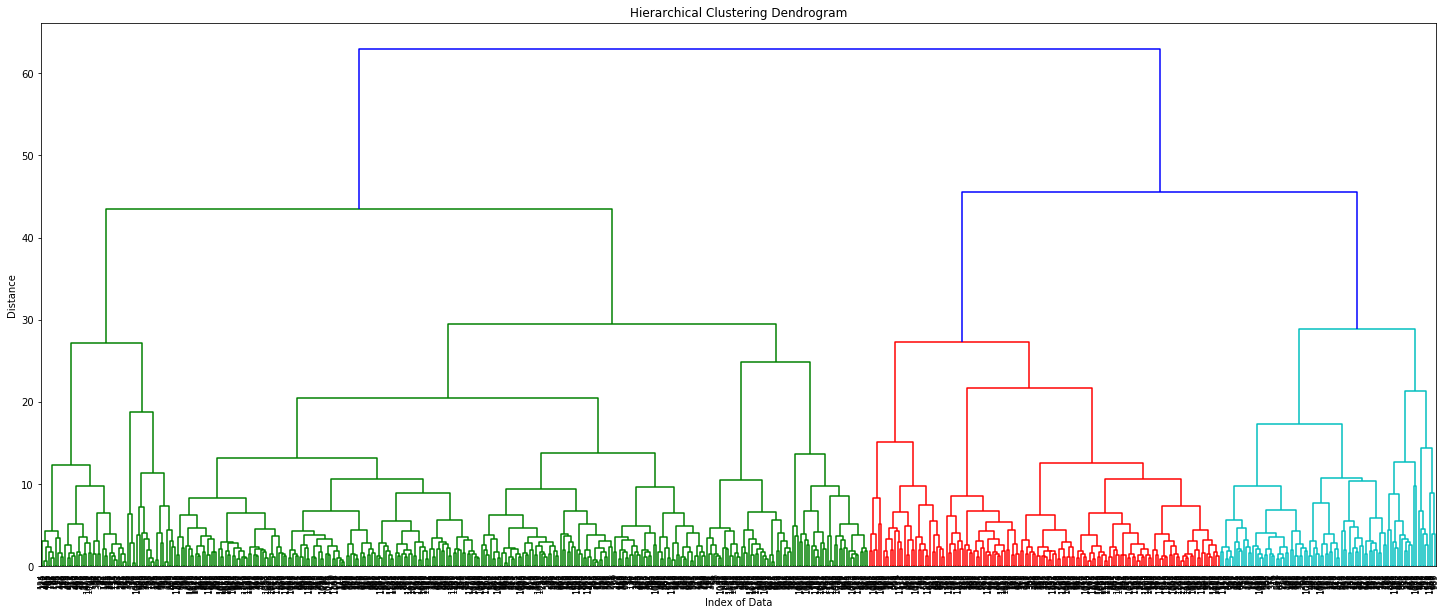

In [555]:
# Choose Methods
Z = linkage(selected_features_df, 'ward')
plot_dendrogram('Bath Soap Member Clustering', "Index", 'Distance'
                , Z)

##### k 선정
---
Dendrogram 상으로 보았을 때 4개의 k를 선정하는 것이 가장 타당한 것으로 보인다. 수립할 수 있는 마케팅 전략의 개수와 유사하다.

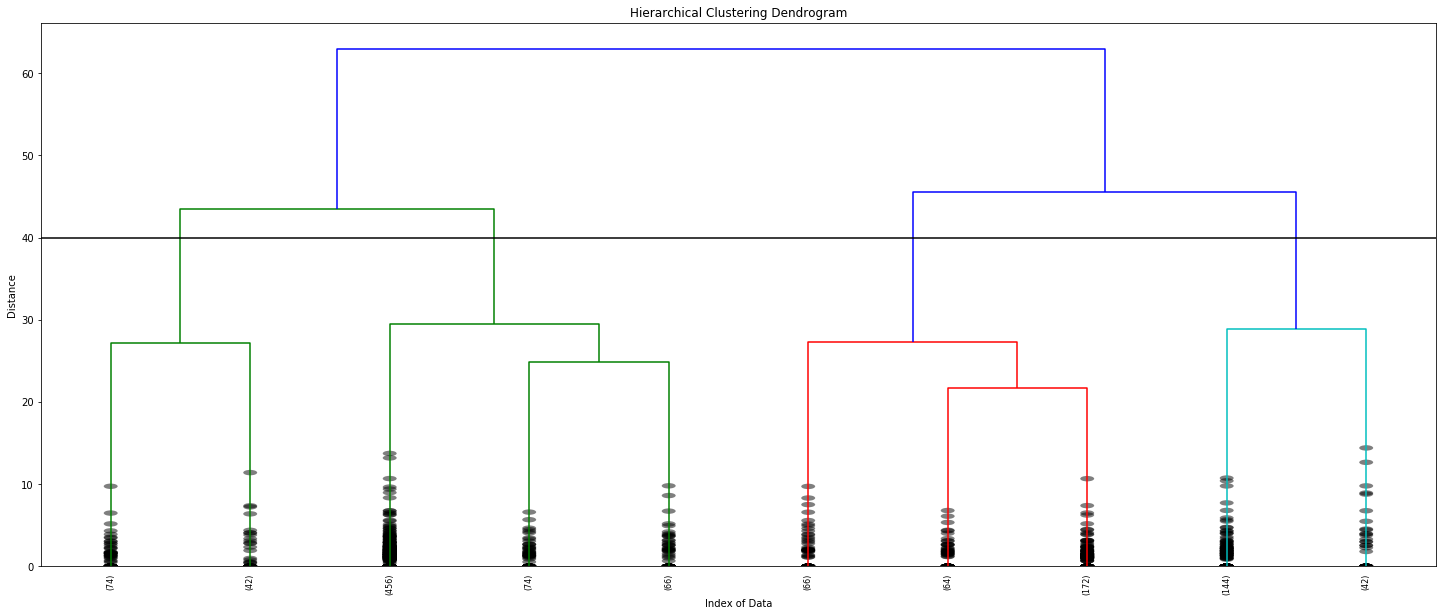

In [564]:
plot_dendrogram('Bath Soap Member Clustering', "Index", 'Distance'
                , Z, p=10, max_d=40)

In [565]:
predicted_labels_bath_soap = fcluster(Z, 40, criterion='distance')

In [566]:
scaled_df['predicted_labels'] = predicted_labels_bath_soap 

#### 5-3. 타겟 클러스터 선정 및 마케팅 기획
---
* 분석된 세분화에서 두 개의 클러스터를 선정하고, 그 집단의 특성에 대해 분석하시오.
* 선정한 두 클러스터에 대한 마케팅 전략을 수립하시오.

In [573]:
# Analysis
scaled_df.groupby('predicted_labels').mean().iloc[:, :40]

,SEC,AGE,EDU,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
predicted_labels,,,,,,,,,,,,,,,,,,,,,
1,3.189655,3.189655,2.775862,4.344828,-0.644224,-0.730761,-0.996437,0.273197,-0.362142,-0.382214,...,0.043923,0.098081,0.002018,0.021422,0.000846,0.004299,0.001376,0.002217,0.702295,0.003309
2,2.406040,3.127517,3.785235,3.479866,-0.132977,-0.418072,-0.405894,-0.520397,-0.541631,-0.473365,...,0.081274,0.100349,0.092856,0.023549,0.027082,0.032020,0.006832,0.022244,0.076908,0.027764
3,2.158940,3.271523,5.112583,4.403974,0.487155,0.930492,1.037780,-0.040492,0.905121,0.250164,...,0.124958,0.110284,0.113423,0.045748,0.021899,0.028061,0.008641,0.048124,0.045350,0.029468
4,2.924731,3.408602,3.924731,6.032258,0.036900,0.284573,0.237043,1.562874,0.491797,1.348993,...,0.104928,0.063440,0.034131,0.035649,0.007770,0.038622,0.003331,0.010090,0.122460,0.024984
